In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline

In [ ]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [ ]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)

db = client[db_name]
collection = db['Thrifty_Aggregated']

In [ ]:
cust_seg1= pd.DataFrame(list(collection.find()))
cust_seg1.head()

,_id,Customer_Id,Name,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,60acfa08a261274b78a77ff5,0,Bertha Weinhold-Kade,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,60acfa08a261274b78a77ff6,1,Ewald Käster-Ditschlerin,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0
2,60acfa08a261274b78a77ff7,2,Egbert Radisch-Hänel,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0
3,60acfa08a261274b78a77ff8,3,Ing. Veronika Seidel,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0
4,60acfa08a261274b78a77ff9,4,Franz Reichmann,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0


In [ ]:
cust_seg1.drop(['_id','Name','Customer_Id'],axis='columns',inplace=True)
cust_seg1

,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0
2,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0
3,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0
4,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,99,69.0,70,8,159,113,94,127,116,142,127,127,116,108,97,60,109,109,144,121,56,134,135,102,116,1100.0,60.0,76.0,60.0,54.0,50.0,48.0,83.0,58.0,56.0,76.0,73.0,60.0,52.0,52.0,87.0,56.0,45.0,89.0,67.0,27.0,83.0,388,418,363,407,407,429,3.09,1200.0,840.0,1200.0,0.0,115.0,280795.0,1770.0,805.0,0.0,500.0
2236,0,99,85.0,164,6,93,113,95,158,64,82,101,76,118,143,141,92,90,100,98,78,161,167,150,58,83,1114.0,65.0,45.0,53.0,38.0,57.0,61.0,47.0,103.0,31.0,45.0,48.0,22.0,53.0,28.0,86.0,44.0,41.0,60.0,67.0,63.0,90.0,412,348,445,301,364,391,3.02,3840.0,450.0,1650.0,1385.0,0.0,258540.0,800.0,2550.0,2235.0,0.0
2237,1,99,35.0,86,12,74,130,182,100,89,130,104,81,94,76,126,104,116,146,122,93,116,95,146,113,106,1080.0,42.0,47.0,52.0,75.0,82.0,57.0,54.0,44.0,91.0,68.0,65.0,66.0,47.0,52.0,61.0,51.0,70.0,69.0,71.0,66.0,33.0,390,335,426,443,379,370,2.88,0.0,190.0,80.0,1040.0,915.0,277655.0,0.0,0.0,1200.0,1580.0
2238,1,99,19.0,151,13,127,112,89,104,72,110,89,78,100,92,106,158,93,116,95,98,114,102,106,137,60,1135.0,60.0,40.0,58.0,40.0,33.0,58.0,32.0,77.0,52.0,41.0,64.0,33.0,103.0,37.0,90.0,46.0,56.0,26.0,32.0,16.0,29.0,291,446,333,325,381,382,2.99,0.0,2335.0,0.0,1800.0,500.0,264885.0,400.0,0.0,270.0,0.0


In [ ]:
cust_seg_copy=cust_seg1.copy()
cust_seg_copy

,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0
2,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0
3,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0
4,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,99,69.0,70,8,159,113,94,127,116,142,127,127,116,108,97,60,109,109,144,121,56,134,135,102,116,1100.0,60.0,76.0,60.0,54.0,50.0,48.0,83.0,58.0,56.0,76.0,73.0,60.0,52.0,52.0,87.0,56.0,45.0,89.0,67.0,27.0,83.0,388,418,363,407,407,429,3.09,1200.0,840.0,1200.0,0.0,115.0,280795.0,1770.0,805.0,0.0,500.0
2236,0,99,85.0,164,6,93,113,95,158,64,82,101,76,118,143,141,92,90,100,98,78,161,167,150,58,83,1114.0,65.0,45.0,53.0,38.0,57.0,61.0,47.0,103.0,31.0,45.0,48.0,22.0,53.0,28.0,86.0,44.0,41.0,60.0,67.0,63.0,90.0,412,348,445,301,364,391,3.02,3840.0,450.0,1650.0,1385.0,0.0,258540.0,800.0,2550.0,2235.0,0.0
2237,1,99,35.0,86,12,74,130,182,100,89,130,104,81,94,76,126,104,116,146,122,93,116,95,146,113,106,1080.0,42.0,47.0,52.0,75.0,82.0,57.0,54.0,44.0,91.0,68.0,65.0,66.0,47.0,52.0,61.0,51.0,70.0,69.0,71.0,66.0,33.0,390,335,426,443,379,370,2.88,0.0,190.0,80.0,1040.0,915.0,277655.0,0.0,0.0,1200.0,1580.0
2238,1,99,19.0,151,13,127,112,89,104,72,110,89,78,100,92,106,158,93,116,95,98,114,102,106,137,60,1135.0,60.0,40.0,58.0,40.0,33.0,58.0,32.0,77.0,52.0,41.0,64.0,33.0,103.0,37.0,90.0,46.0,56.0,26.0,32.0,16.0,29.0,291,446,333,325,381,382,2.99,0.0,2335.0,0.0,1800.0,500.0,264885.0,400.0,0.0,270.0,0.0


In [ ]:
cust_seg_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2240 non-null   int64  
 1   Recency                    2240 non-null   int64  
 2   Current_Age                2240 non-null   float64
 3   Town                       2240 non-null   int64  
 4   State                      2240 non-null   int64  
 5   Hoodies                    2240 non-null   int64  
 6   bags                       2240 non-null   int64  
 7   bathrobe                   2240 non-null   int64  
 8   blazer                     2240 non-null   int64  
 9   blouse                     2240 non-null   int64  
 10  boots                      2240 non-null   int64  
 11  cap                        2240 non-null   int64  
 12  cardigan                   2240 non-null   int64  
 13  coat                       2240 non-null   int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=cust_seg_copy.values
scaled_data = scaler.fit_transform(x)
scaled_data =pd.DataFrame(scaled_data,columns=cust_seg_copy.columns)
scaled_data

,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,-1.002682,-1.696001,1.691276,0.247635,-1.165118,0.580031,-0.087028,0.693062,-0.681802,0.409249,0.618990,0.770502,0.731663,-2.713723,-0.790370,-0.177829,-1.037487,0.493934,-0.244405,-1.703742,0.397901,-0.548437,-1.813495,-0.761417,2.192881,0.120350,-1.005186,1.310679,-0.244299,1.624688,-0.423206,-0.660085,0.081269,0.871830,1.287495,-0.309129,0.038157,-2.164851,0.465461,-0.689349,-0.156922,0.170965,-0.108334,0.604765,0.383592,-0.737338,-1.38029,-0.264481,0.120885,1.034985,-0.886773,-1.820997,-0.717421,0.353739,-0.515660,-0.232851,-0.805656,0.236265,-0.765029,-0.773358,0.025903,-0.260983,-0.588126,-0.173021,-0.823692
1,-1.002682,-1.696001,1.222209,1.630999,-0.771562,-2.042966,-0.626936,0.838368,0.388666,0.589663,0.018742,1.092784,0.768697,-1.053979,-1.109685,0.915242,-0.462140,-0.491392,2.020979,0.446825,0.180423,-0.476138,-0.481920,0.958903,0.719592,1.294315,0.781660,-0.745030,-1.008088,1.522437,1.074722,-0.660085,-0.877643,0.458540,1.794802,-1.912834,-1.075152,0.021070,-1.005036,0.753630,0.049149,0.980397,-0.361220,0.135533,1.635455,1.384857,-0.52060,-0.008037,0.409155,-0.485629,2.339507,0.882862,-0.140226,-1.040503,0.130791,-0.054520,0.467540,0.016053,-0.765029,-0.773358,0.513014,-0.787894,-0.821334,1.102239,-0.667464
2,-1.002682,-1.696001,-0.732237,-0.480452,0.999438,-0.343559,0.524867,1.346942,0.317302,1.888641,-0.299036,0.233366,0.879798,-1.090060,-0.009820,-0.988816,1.515616,0.566921,0.870308,0.738428,-0.689491,1.548224,0.553750,-1.007177,0.396187,-0.021948,0.368452,-1.430266,1.181441,2.391567,0.764806,-0.361420,-1.029050,2.163361,0.830919,0.041681,0.949046,1.014670,-0.903622,2.557354,-0.414510,0.626270,0.346860,-0.385837,-1.076914,0.504923,0.84479,-0.674792,1.831290,1.130023,-0.358836,-1.587571,1.479645,1.070224,-0.515660,-0.809805,-0.510274,-0.151729,-0.765029,1.547787,0.756987,-0.787894,0.057266,-0.816009,1.316634
3,-1.002682,-1.696001,1.378565,1.148642,1.589771,2.796649,-1.022868,0.220814,-0.146568,0.697911,-0.934593,1.880584,-0.601549,1.219148,-1.145165,-0.671473,0.257044,-0.819834,0.223055,0.155223,0.397901,-0.042346,-0.629873,1.590857,-0.250623,-0.555569,0.390788,3.102836,0.264894,-0.164696,1.539597,-0.610308,0.434552,0.355217,-0.538810,-0.910518,0.949046,-0.575091,-0.345847,-0.277070,-0.981204,-1.296129,-0.715260,0.083396,1.426811,-0.219729,-0.52060,1.069029,1.216313,-0.010437,-0.241517,1.077384,-0.456752,-0.188466,1.552983,-0.809805,-0.805656,-0.602641,-0.765029,-0.773358,-0.353271,-0.008066,-0.062050,-0.355201,-0.261271
4,0.997325,-1.696001,-0.028636,-1.081123,-1.165118,-1.562699,0.272910,1.492249,-0.146568,0.337084,0.089359,-0.482815,1.435303,1.796450,-0.009820,1.091544,-0.605977,-0.162950,-0.711866,-1.448590,0.905351,-0.946080,-0.370955,-0.620983,0.324319,-0.697867,0.212103,-0.270635,-0.498895,0.908934,-0.888081,-0.261865,-1.079520,-1.297943,1.439687,2.046311,-0.467893,-1.568691,-0.497968,-0.122465,-0.569063,0.373323,1.459556,0.291944,-1.337719,0.142597,0.64251,0.504852,-0.782363,-0.523644,-0.104645,1.019027,-1.331855,1.786710,-1.032821,-0.809805,-0.484810,1.242952,0.882048,-0.757884,0.798994,0.123662,-0.062050,-0.692770,1.780111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([5.74093453e-02, 2.13530826e-02, 2.04582906e-02, 1.98305152e-02,
       1.96146026e-02, 1.95262378e-02, 1.94401177e-02, 1.90986754e-02,
       1.90150249e-02, 1.86075776e-02, 1.85573340e-02, 1.82345161e-02,
       1.81329164e-02, 1.79889460e-02, 1.77411366e-02, 1.76385034e-02,
       1.73145850e-02, 1.72440376e-02, 1.71257443e-02, 1.69608132e-02,
       1.66792412e-02, 1.65993315e-02, 1.65527556e-02, 1.63489346e-02,
       1.62893940e-02, 1.61458747e-02, 1.60002738e-02, 1.58338684e-02,
       1.57360153e-02, 1.55154222e-02, 1.54737628e-02, 1.52162496e-02,
       1.51690598e-02, 1.50810672e-02, 1.48836321e-02, 1.47867335e-02,
       1.45968395e-02, 1.44664600e-02, 1.44011259e-02, 1.42728055e-02,
       1.41092215e-02, 1.39530558e-02, 1.38365140e-02, 1.36385367e-02,
       1.35596392e-02, 1.34288629e-02, 1.33573990e-02, 1.32676464e-02,
       1.31378193e-02, 1.30659455e-02, 1.28875525e-02, 1.27437282e-02,
       1.26463177e-02, 1.24931204e-02, 1.22911146e-02, 1.21061702e-02,
      

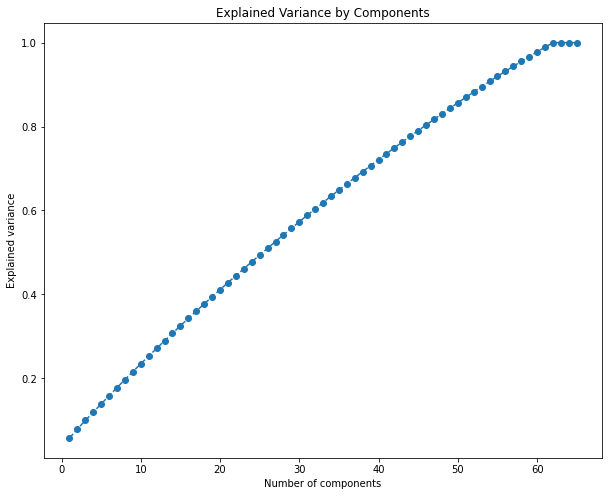

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,66),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show;

In [ ]:
pca=PCA(n_components=50)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.transform(scaled_data)
new_data= pca.transform(scaled_data)
new_data

array([[-1.28821937,  2.03699273, -0.23911792, ...,  0.22031439,
        -0.79030161, -0.95681344],
       [ 1.27269579,  0.07350717, -0.07878983, ...,  1.47080382,
         0.13450229, -0.48121238],
       [ 2.46798063, -0.64606708,  0.33336689, ...,  0.58379905,
        -0.97488314, -0.05282252],
       ...,
       [ 0.3282237 ,  0.15602236, -0.47616846, ..., -0.77881422,
        -0.02896835, -1.16118229],
       [-1.96935799,  0.93547138,  1.0080375 , ..., -0.91497625,
         0.58362008,  1.73300216],
       [-3.67066962, -0.43365591,  1.5952268 , ...,  0.15995313,
        -0.37484172,  0.05362301]])

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,50):
  kmeans_pca=KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmeans_pca.fit_predict(new_data)
  wcss.append(kmeans_pca.inertia_)


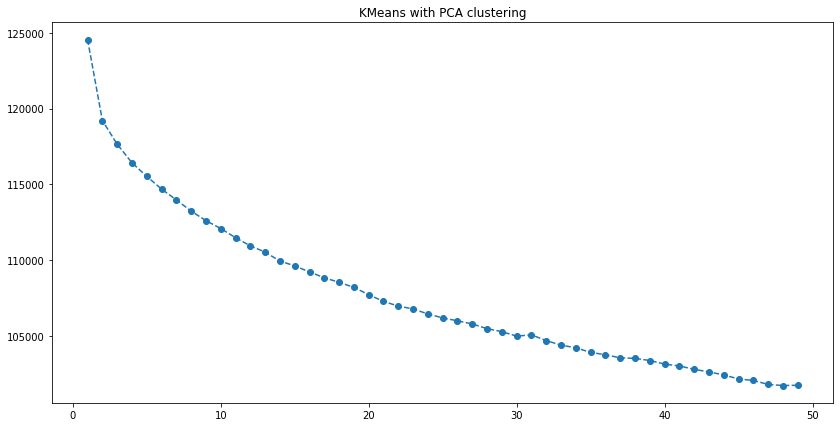

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(range(1,50),wcss,marker='o',linestyle='--')
plt.title('KMeans with PCA clustering')
plt.show;

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
l1=[]
l2=[]
l3=[]
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(new_data)
  pred_k1=mod_k.predict(new_data)
  kmean_sil=silhouette_score((new_data),pred_k1,metric='euclidean')
  kmean_dav=davies_bouldin_score((new_data),pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,'Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_dav)
  l3.append(i)

2 	 Silhouette Score: 0.042590541399834744 Davies Bouldin Score:  4.686955677418467
3 	 Silhouette Score: 0.018763686942940613 Davies Bouldin Score:  6.013662832638846
4 	 Silhouette Score: 0.019335508286754365 Davies Bouldin Score:  5.914762221730368
5 	 Silhouette Score: 0.016293019171491372 Davies Bouldin Score:  5.786221260103796


In [ ]:
pd.DataFrame({'Cluster':l3,'Silhoutte Score':l1,'Davies Bouldin Score':l2})

,Cluster,Silhoutte Score,Davies Bouldin Score
0,2,0.042591,4.686956
1,3,0.018764,6.013663
2,4,0.019336,5.914762
3,5,0.016293,5.786221


In [ ]:
kmeans_pca1=KMeans(n_clusters=2,init='k-means++', random_state=42)
label=kmeans_pca1.fit_predict(new_data)

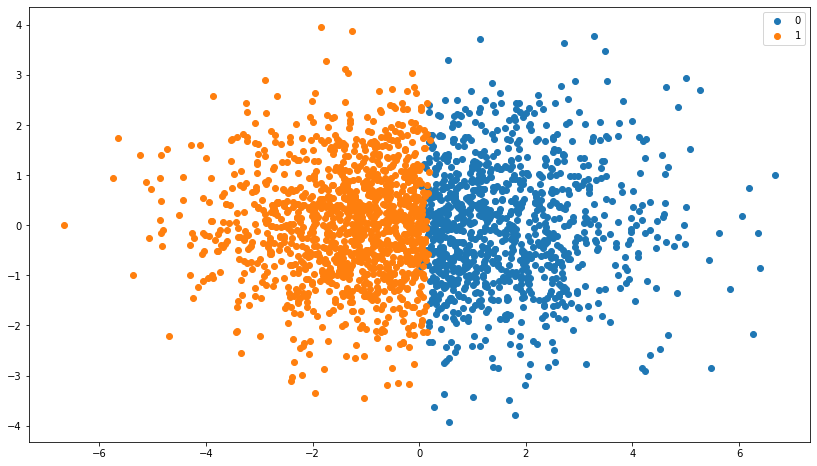

In [ ]:
u_labels = np.unique(kmeans_pca1.labels_)
plt.figure(figsize=(14,8))
#plotting the results:
 
for i in u_labels:
    plt.scatter(new_data[label == i , 0] , new_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
kmeans_pca2=KMeans(n_clusters=3,init='k-means++', random_state=42)
label=kmeans_pca2.fit_predict(new_data)

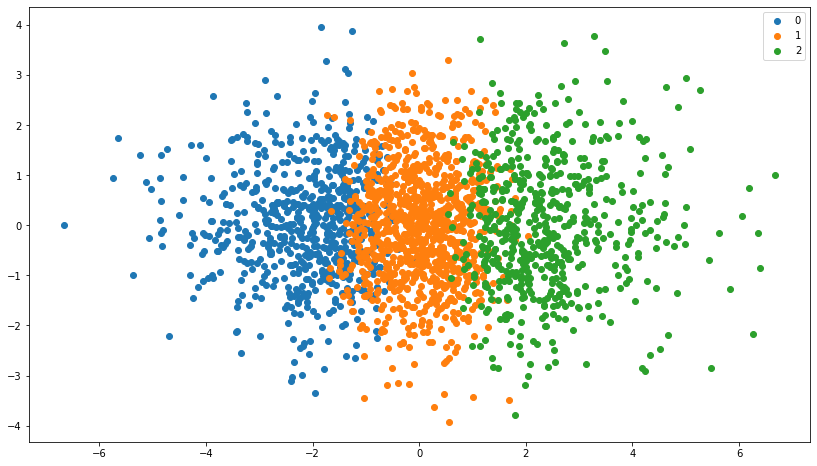

In [ ]:
 u_labels = np.unique(kmeans_pca2.labels_)
plt.figure(figsize=(14,8))
#plotting the results:
 
for i in u_labels:
    plt.scatter(new_data[label == i , 0] , new_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
df_new_data = pd.DataFrame(scaled_data)
df_new_data['labels'] = kmeans_pca1.labels_
df_mean = (df_new_data.loc[df_new_data.labels!=-1, :]
                    .groupby('labels',as_index=False).mean())
df_mean

,labels,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,0,-0.023008,-0.013874,-0.042296,-0.016843,-0.033788,0.146614,0.224338,0.16170,0.194572,0.148601,0.246728,0.114361,0.192040,0.258293,0.150851,0.293220,0.158809,0.147227,0.170910,0.137404,0.192072,0.094342,0.213874,0.111641,0.221701,0.211818,0.602338,0.183297,0.144423,0.123149,0.094721,0.154232,0.115273,0.107013,0.111948,0.107952,0.143580,0.107926,0.111495,0.187394,0.126350,0.17072,0.076152,0.098941,0.135361,0.163742,0.092996,0.066985,0.363854,0.314165,0.322119,0.309483,0.352651,0.358238,0.053692,0.018138,0.062450,0.086356,0.069947,-0.015332,0.783865,0.085722,0.053659,0.027900,0.087150
1,1,0.019691,0.011874,0.036199,0.014415,0.028917,-0.125479,-0.191998,-0.13839,-0.166523,-0.127179,-0.211160,-0.097875,-0.164355,-0.221058,-0.129104,-0.250949,-0.135915,-0.126003,-0.146272,-0.117596,-0.164383,-0.080742,-0.183042,-0.095547,-0.189741,-0.181283,-0.515505,-0.156873,-0.123603,-0.105396,-0.081066,-0.131998,-0.098655,-0.091586,-0.095809,-0.092390,-0.122882,-0.092367,-0.095422,-0.160379,-0.108136,-0.14611,-0.065174,-0.084678,-0.115847,-0.140137,-0.079589,-0.057328,-0.311401,-0.268875,-0.275683,-0.264868,-0.301813,-0.306595,-0.045952,-0.015524,-0.053447,-0.073907,-0.059863,0.013122,-0.670864,-0.073364,-0.045924,-0.023878,-0.074586


In [ ]:
df_new_data = pd.DataFrame(scaled_data)
df_new_data['labels'] = kmeans_pca1.labels_
df_mean = (df_new_data.loc[df_new_data.labels!=-1, :]
                    .groupby('labels',as_index=False).mean())
df_mean

,labels,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,0,-0.023008,-0.013874,-0.042296,-0.016843,-0.033788,0.146614,0.224338,0.16170,0.194572,0.148601,0.246728,0.114361,0.192040,0.258293,0.150851,0.293220,0.158809,0.147227,0.170910,0.137404,0.192072,0.094342,0.213874,0.111641,0.221701,0.211818,0.602338,0.183297,0.144423,0.123149,0.094721,0.154232,0.115273,0.107013,0.111948,0.107952,0.143580,0.107926,0.111495,0.187394,0.126350,0.17072,0.076152,0.098941,0.135361,0.163742,0.092996,0.066985,0.363854,0.314165,0.322119,0.309483,0.352651,0.358238,0.053692,0.018138,0.062450,0.086356,0.069947,-0.015332,0.783865,0.085722,0.053659,0.027900,0.087150
1,1,0.019691,0.011874,0.036199,0.014415,0.028917,-0.125479,-0.191998,-0.13839,-0.166523,-0.127179,-0.211160,-0.097875,-0.164355,-0.221058,-0.129104,-0.250949,-0.135915,-0.126003,-0.146272,-0.117596,-0.164383,-0.080742,-0.183042,-0.095547,-0.189741,-0.181283,-0.515505,-0.156873,-0.123603,-0.105396,-0.081066,-0.131998,-0.098655,-0.091586,-0.095809,-0.092390,-0.122882,-0.092367,-0.095422,-0.160379,-0.108136,-0.14611,-0.065174,-0.084678,-0.115847,-0.140137,-0.079589,-0.057328,-0.311401,-0.268875,-0.275683,-0.264868,-0.301813,-0.306595,-0.045952,-0.015524,-0.053447,-0.073907,-0.059863,0.013122,-0.670864,-0.073364,-0.045924,-0.023878,-0.074586


In [ ]:

from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])


In [ ]:
cluster_report(cust_seg_copy, clusters=kmeans_pca1.labels_, min_samples_leaf=50, pruning_level=0.01)
cluster_report

,class_name,instance_count,rule_list
1,0,1033,[0.6548672566371682] (Not_Holiday <= 274122.5) and (Not_Holiday > 266727.5) and (online > 1177.5)[0.6968215158924206] (Not_Holiday > 274122.5) and (Not_Holiday <= 282540.0)[0.978369384359401] (Not_Holiday > 274122.5) and (Not_Holiday > 282540.0)
0,1,1207,[0.958904109589041] (Not_Holiday <= 274122.5) and (Not_Holiday <= 266727.5)[0.7925311203319502] (Not_Holiday <= 274122.5) and (Not_Holiday > 266727.5) and (online <= 1177.5)


<function __main__.cluster_report>

In [ ]:
cust_seg_copy['Clusters']= kmeans_pca1.labels_
cust_seg_copy['Gender']= cust_seg_copy['Gender'].map({0:'Female',1:'Male'})
cust_seg_copy

,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,Clusters
0,Female,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0,1
1,Female,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0,0
2,Female,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0,0
3,Female,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0,0
4,Male,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Female,99,69.0,70,8,159,113,94,127,116,142,127,127,116,108,97,60,109,109,144,121,56,134,135,102,116,1100.0,60.0,76.0,60.0,54.0,50.0,48.0,83.0,58.0,56.0,76.0,73.0,60.0,52.0,52.0,87.0,56.0,45.0,89.0,67.0,27.0,83.0,388,418,363,407,407,429,3.09,1200.0,840.0,1200.0,0.0,115.0,280795.0,1770.0,805.0,0.0,500.0,0
2236,Female,99,85.0,164,6,93,113,95,158,64,82,101,76,118,143,141,92,90,100,98,78,161,167,150,58,83,1114.0,65.0,45.0,53.0,38.0,57.0,61.0,47.0,103.0,31.0,45.0,48.0,22.0,53.0,28.0,86.0,44.0,41.0,60.0,67.0,63.0,90.0,412,348,445,301,364,391,3.02,3840.0,450.0,1650.0,1385.0,0.0,258540.0,800.0,2550.0,2235.0,0.0,1
2237,Male,99,35.0,86,12,74,130,182,100,89,130,104,81,94,76,126,104,116,146,122,93,116,95,146,113,106,1080.0,42.0,47.0,52.0,75.0,82.0,57.0,54.0,44.0,91.0,68.0,65.0,66.0,47.0,52.0,61.0,51.0,70.0,69.0,71.0,66.0,33.0,390,335,426,443,379,370,2.88,0.0,190.0,80.0,1040.0,915.0,277655.0,0.0,0.0,1200.0,1580.0,0
2238,Male,99,19.0,151,13,127,112,89,104,72,110,89,78,100,92,106,158,93,116,95,98,114,102,106,137,60,1135.0,60.0,40.0,58.0,40.0,33.0,58.0,32.0,77.0,52.0,41.0,64.0,33.0,103.0,37.0,90.0,46.0,56.0,26.0,32.0,16.0,29.0,291,446,333,325,381,382,2.99,0.0,2335.0,0.0,1800.0,500.0,264885.0,400.0,0.0,270.0,0.0,1


In [ ]:
age_group=pd.cut(cust_seg_copy.Current_Age,bins=[2,15,30,45,60,79,90,120],labels=['0-14','15-29','30-44','45-59','60-74','75-89','90+'])
cust_seg_copy.insert(3,'Age_Group',age_group)
cust_seg_copy

,Gender,Recency,Current_Age,Age_Group,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,Clusters
0,Female,0,94.0,90+,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0,1
1,Female,0,82.0,75-89,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0,0
2,Female,0,32.0,30-44,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0,0
3,Female,0,86.0,75-89,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0,0
4,Male,0,50.0,45-59,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Female,99,69.0,60-74,70,8,159,113,94,127,116,142,127,127,116,108,97,60,109,109,144,121,56,134,135,102,116,1100.0,60.0,76.0,60.0,54.0,50.0,48.0,83.0,58.0,56.0,76.0,73.0,60.0,52.0,52.0,87.0,56.0,45.0,89.0,67.0,27.0,83.0,388,418,363,407,407,429,3.09,1200.0,840.0,1200.0,0.0,115.0,280795.0,1770.0,805.0,0.0,500.0,0
2236,Female,99,85.0,75-89,164,6,93,113,95,158,64,82,101,76,118,143,141,92,90,100,98,78,161,167,150,58,83,1114.0,65.0,45.0,53.0,38.0,57.0,61.0,47.0,103.0,31.0,45.0,48.0,22.0,53.0,28.0,86.0,44.0,41.0,60.0,67.0,63.0,90.0,412,348,445,301,364,391,3.02,3840.0,450.0,1650.0,1385.0,0.0,258540.0,800.0,2550.0,2235.0,0.0,1
2237,Male,99,35.0,30-44,86,12,74,130,182,100,89,130,104,81,94,76,126,104,116,146,122,93,116,95,146,113,106,1080.0,42.0,47.0,52.0,75.0,82.0,57.0,54.0,44.0,91.0,68.0,65.0,66.0,47.0,52.0,61.0,51.0,70.0,69.0,71.0,66.0,33.0,390,335,426,443,379,370,2.88,0.0,190.0,80.0,1040.0,915.0,277655.0,0.0,0.0,1200.0,1580.0,0
2238,Male,99,19.0,15-29,151,13,127,112,89,104,72,110,89,78,100,92,106,158,93,116,95,98,114,102,106,137,60,1135.0,60.0,40.0,58.0,40.0,33.0,58.0,32.0,77.0,52.0,41.0,64.0,33.0,103.0,37.0,90.0,46.0,56.0,26.0,32.0,16.0,29.0,291,446,333,325,381,382,2.99,0.0,2335.0,0.0,1800.0,500.0,264885.0,400.0,0.0,270.0,0.0,1


In [ ]:
K_Means_0 = cust_seg_copy[cust_seg_copy.Clusters==0]
K_Means_0

,Gender,Recency,Current_Age,Age_Group,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,Clusters
1,Female,0,82.0,75-89,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0,0
2,Female,0,32.0,30-44,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0,0
3,Female,0,86.0,75-89,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0,0
4,Male,0,50.0,45-59,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0,0
5,Male,0,46.0,45-59,167,8,152,117,158,83,140,125,71,127,122,97,112,110,95,181,109,161,119,107,74,89,132,1358.0,72.0,62.0,66.0,67.0,44.0,47.0,43.0,41.0,6.0,63.0,52.0,66.0,50.0,41.0,66.0,32.0,61.0,67.0,71.0,56.0,50.0,300,504,328,511,332,506,2.98,0.0,700.0,400.0,0.0,160.0,287985.0,1285.0,315.0,1000.0,3335.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Female,99,53.0,45-59,376,6,138,121,114,96,112,98,163,84,139,78,127,95,98,91,82,111,90,108,146,137,140,1158.0,66.0,43.0,64.0,37.0,27.0,89.0,100.0,56.0,56.0,57.0,36.0,76.0,42.0,36.0,42.0,42.0,83.0,68.0,66.0,81.0,43.0,397,453,357,380,372,409,3.07,1200.0,2330.0,100.0,3200.0,0.0,280475.0,300.0,1165.0,1400.0,1720.0,0
2230,Male,99,12.0,0-14,344,7,80,156,149,131,104,124,97,70,174,114,97,93,95,106,96,88,175,85,88,166,96,1217.0,52.0,63.0,98.0,57.0,40.0,50.0,65.0,44.0,36.0,84.0,63.0,55.0,60.0,24.0,48.0,61.0,35.0,68.0,68.0,20.0,76.0,446,325,412,362,440,399,2.90,2400.0,100.0,920.0,250.0,0.0,302050.0,0.0,3650.0,0.0,2910.0,0
2232,Female,99,55.0,45-59,220,6,72,94,179,95,89,141,109,99,86,169,166,155,114,113,72,117,158,92,85,181,78,1141.0,93.0,59.0,55.0,74.0,69.0,45.0,59.0,73.0,75.0,63.0,57.0,82.0,63.0,37.0,74.0,54.0,25.0,71.0,47.0,72.0,76.0,495,375,367,364,419,444,3.02,240.0,0.0,1060.0,180.0,0.0,308970.0,2080.0,2450.0,0.0,0.0,0
2235,Female,99,69.0,60-74,70,8,159,113,94,127,116,142,127,127,116,108,97,60,109,109,144,121,56,134,135,102,116,1100.0,60.0,76.0,60.0,54.0,50.0,48.0,83.0,58.0,56.0,76.0,73.0,60.0,52.0,52.0,87.0,56.0,45.0,89.0,67.0,27.0,83.0,388,418,363,407,407,429,3.09,1200.0,840.0,1200.0,0.0,115.0,280795.0,1770.0,805.0,0.0,500.0,0


In [ ]:
K_Means_1 = cust_seg_copy[cust_seg_copy.Clusters==1]
K_Means_1

,Gender,Recency,Current_Age,Age_Group,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,Clusters
0,Female,0,94.0,90+,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0,1
6,Female,0,84.0,75-89,112,13,121,91,127,110,103,93,177,112,112,77,103,66,111,66,110,89,115,115,154,86,43,1052.0,47.0,62.0,62.0,76.0,77.0,60.0,58.0,37.0,51.0,57.0,68.0,45.0,62.0,55.0,17.0,29.0,43.0,66.0,43.0,41.0,73.0,490,328,321,327,362,353,2.89,0.0,0.0,160.0,2370.0,450.0,242715.0,1980.0,350.0,355.0,0.0,1
8,Male,0,50.0,45-59,375,3,117,162,63,147,88,46,101,98,110,98,130,116,112,121,106,103,45,94,146,117,120,1076.0,86.0,73.0,32.0,53.0,39.0,57.0,21.0,57.0,51.0,89.0,30.0,31.0,79.0,64.0,78.0,91.0,60.0,53.0,43.0,54.0,23.0,378,309,421,315,379,438,3.03,1225.0,400.0,895.0,2020.0,500.0,262355.0,3825.0,2450.0,70.0,3825.0,1
9,Male,0,93.0,90+,89,9,81,96,107,135,126,60,98,84,108,78,78,97,83,90,125,102,116,133,127,115,108,1021.0,62.0,81.0,44.0,15.0,59.0,50.0,78.0,48.0,38.0,58.0,47.0,30.0,28.0,78.0,56.0,60.0,43.0,34.0,80.0,55.0,82.0,391,282,314,399,380,381,3.17,1750.0,0.0,0.0,0.0,960.0,246925.0,0.0,0.0,120.0,560.0,1
10,Male,0,55.0,45-59,35,9,115,109,142,127,139,75,110,69,95,171,109,116,113,82,73,104,114,137,110,56,131,1265.0,33.0,73.0,36.0,14.0,63.0,40.0,84.0,36.0,46.0,51.0,47.0,35.0,50.0,72.0,30.0,10.0,47.0,67.0,36.0,74.0,88.0,332,373,341,406,476,369,2.84,2590.0,450.0,1750.0,440.0,400.0,250980.0,1550.0,365.0,2715.0,1765.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Female,99,36.0,30-44,64,10,149,74,124,104,124,84,70,72,146,24,149,133,129,107,153,134,82,103,130,100,93,1249.0,74.0,35.0,51.0,85.0,52.0,40.0,50.0,47.0,43.0,29.0,53.0,14.0,42.0,67.0,40.0,36.0,68.0,55.0,56.0,40.0,58.0,346,421,443,391,356,327,2.96,0.0,0.0,0.0,0.0,0.0,258895.0,1035.0,75.0,4320.0,2935.0,1
2234,Male,99,90.0,75-89,8,15,95,108,134,115,102,153,92,73,107,95,79,104,90,123,111,119,92,86,87,83,63,1032.0,39.0,60.0,53.0,57.0,62.0,42.0,51.0,47.0,50.0,78.0,43.0,32.0,94.0,50.0,46.0,55.0,41.0,64.0,52.0,22.0,41.0,350,243,352,311,435,420,2.95,1505.0,0.0,1500.0,0.0,0.0,241310.0,1935.0,750.0,5940.0,0.0,1
2236,Female,99,85.0,75-89,164,6,93,113,95,158,64,82,101,76,118,143,141,92,90,100,98,78,161,167,150,58,83,1114.0,65.0,45.0,53.0,38.0,57.0,61.0,47.0,103.0,31.0,45.0,48.0,22.0,53.0,28.0,86.0,44.0,41.0,60.0,67.0,63.0,90.0,412,348,445,301,364,391,3.02,3840.0,450.0,1650.0,1385.0,0.0,258540.0,800.0,2550.0,2235.0,0.0,1
2238,Male,99,19.0,15-29,151,13,127,112,89,104,72,110,89,78,100,92,106,158,93,116,95,98,114,102,106,137,60,1135.0,60.0,40.0,58.0,40.0,33.0,58.0,32.0,77.0,52.0,41.0,64.0,33.0,103.0,37.0,90.0,46.0,56.0,26.0,32.0,16.0,29.0,291,446,333,325,381,382,2.99,0.0,2335.0,0.0,1800.0,500.0,264885.0,400.0,0.0,270.0,0.0,1


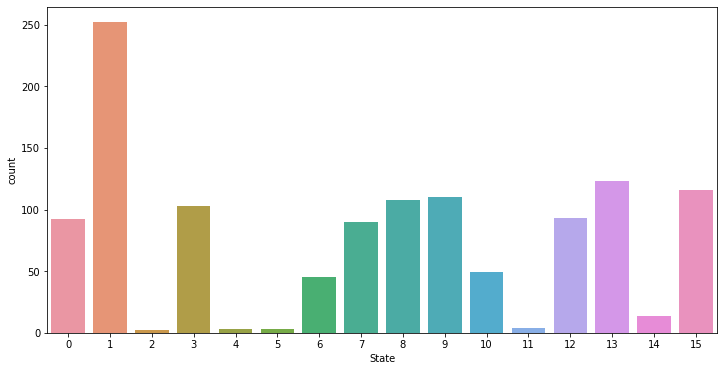

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='State',data=K_Means_1)

In [ ]:
product_0=cust_seg_copy[cust_seg_copy.Clusters==0].iloc[:,6:27].sum()
product_1= cust_seg_copy[cust_seg_copy.Clusters==1].iloc[:,6:27].sum()
new_product=pd.DataFrame({'0':product_0,'1':product_1})
new_product['Item_Name']=new_product.index
new_product

,0,1,Item_Name
Hoodies,118039,129032,Hoodies
bags,120500,126836,bags
bathrobe,117114,126870,bathrobe
blazer,120407,128474,blazer
blouse,118564,129310,blouse
boots,121333,126118,boots
cap,117428,130054,cap
cardigan,119238,127707,cardigan
coat,121243,125630,coat
dresses,119341,129919,dresses


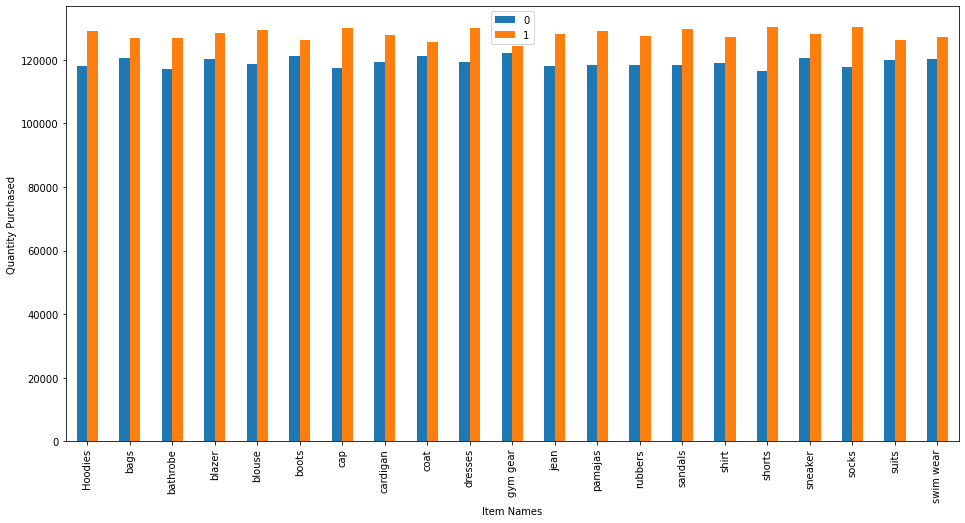

In [ ]:
new_product.plot(kind='bar',stacked=False,x='Item_Name',figsize=(16,8),xlabel='Item Names',ylabel='Quantity Purchased')

In [ ]:
product_0_mean=cust_seg_copy[cust_seg_copy.Clusters==0].iloc[:,6:27].mean()
product_1_mean= cust_seg_copy[cust_seg_copy.Clusters==1].iloc[:,6:27].mean()
new_product_mean=pd.DataFrame({'0':product_0_mean,'1':product_1_mean})
new_product_mean['Item_Name']=new_product.index
new_product_mean

,0,1,Item_Name
Hoodies,114.268151,106.903065,Hoodies
bags,116.650532,105.083679,bags
bathrobe,113.372701,105.111848,bathrobe
blazer,116.560503,106.440762,blazer
blouse,114.776379,107.133389,blouse
boots,117.456922,104.488815,boots
cap,113.676670,107.749793,cap
cardigan,115.428848,105.805302,cardigan
coat,117.369797,104.084507,coat
dresses,115.528558,107.637945,dresses


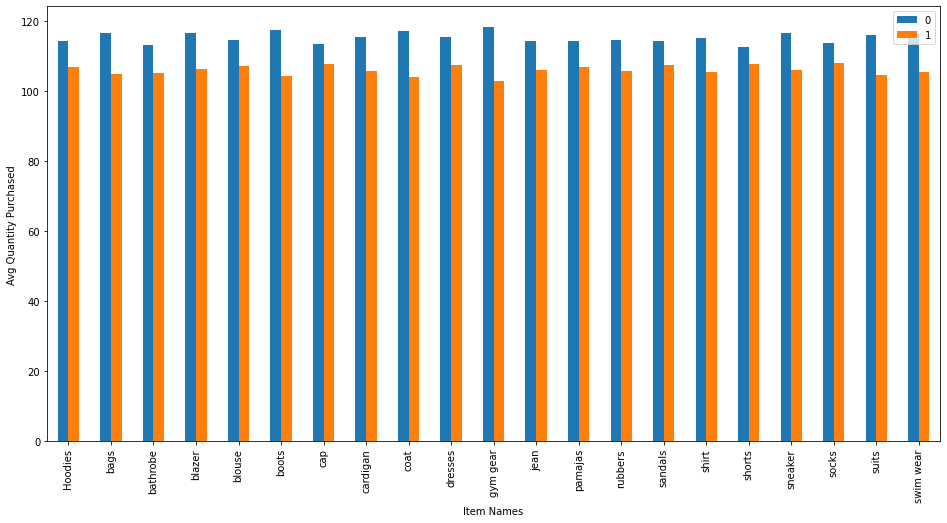

In [ ]:
new_product_mean.plot(kind='bar',stacked=False,x='Item_Name',figsize=(16,8),xlabel='Item Names',ylabel='Avg Quantity Purchased')

In [ ]:
cust_seg_copy.columns[27:49]

Index(['online', 'showroom_0', 'showroom_1', 'showroom_10', 'showroom_11',
       'showroom_12', 'showroom_13', 'showroom_14', 'showroom_15',
       'showroom_16', 'showroom_17', 'showroom_18', 'showroom_19',
       'showroom_2', 'showroom_20', 'showroom_3', 'showroom_4', 'showroom_5',
       'showroom_6', 'showroom_7', 'showroom_8', 'showroom_9'],
      dtype='object')

In [ ]:
online_or_showroom_0=cust_seg_copy[cust_seg_copy.Clusters==0].iloc[:,27:49].sum()
online_or_showroom_1= cust_seg_copy[cust_seg_copy.Clusters==1].iloc[:,27:49].sum()
online_or_showroom=pd.DataFrame({'0':online_or_showroom_0,'1':online_or_showroom_1})
online_or_showroom['column']=online_or_showroom.index
online_or_showroom

,0,1,column
online,1249871.0,1339586.0,online
showroom_0,60546.0,62955.0,showroom_0
showroom_1,59536.0,63211.0,showroom_1
showroom_10,59532.0,64164.0,showroom_10
showroom_11,58909.0,64724.0,showroom_11
showroom_12,60285.0,63499.0,showroom_12
showroom_13,59577.0,64496.0,showroom_13
showroom_14,59083.0,64395.0,showroom_14
showroom_15,59736.0,64855.0,showroom_15
showroom_16,59214.0,64363.0,showroom_16


In [ ]:
online= online_or_showroom.iloc[0:1].sum()
online= pd.DataFrame(online).drop('column',axis=0)
online['column']=online.index
online

,0,column
0,1.24987e+06,0
1,1.33959e+06,1


In [ ]:
showroom=online_or_showroom.iloc[1:,:].sum()
showroom= pd.DataFrame(showroom).drop('column',axis=0)
showroom['column']=showroom.index
showroom

,0,column
0,1.25285e+06,0
1,1.34886e+06,1


In [ ]:
online_or_showroom= pd.merge(online,showroom,on='column')
online_or_showroom=online_or_showroom.rename({'0_x':'online','0_y':'showroom'},axis=1)
online_or_showroom

,online,column,showroom
0,1.24987e+06,0,1.25285e+06
1,1.33959e+06,1,1.34886e+06


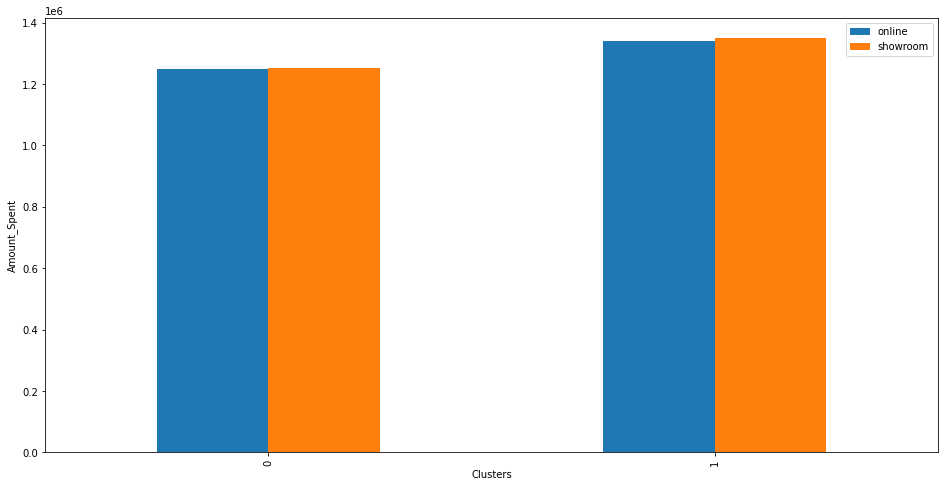

In [ ]:
online_or_showroom.plot(kind='bar',stacked=False,x='column',figsize=(16,8),xlabel='Clusters',ylabel='Amount_Spent')

In [ ]:
online_mean0=cust_seg_copy[cust_seg_copy.Clusters==0]['online']
online_mean0=online_mean0.mean()
online_mean0

1209.9428848015489

In [ ]:
online_mean0=cust_seg_copy[cust_seg_copy.Clusters==0]['online'].mean()
online_mean1= cust_seg_copy[cust_seg_copy.Clusters==1]['online'].mean()
online_mean=pd.DataFrame([online_mean0,online_mean1])
online_mean['column']=online_mean.index
online_mean

,0,column
0,1209.942885,0
1,1109.847556,1


In [ ]:

showroom_mean0=cust_seg_copy[cust_seg_copy.Clusters==0].iloc[:,27:48].mean().sum()
showroom_mean1= cust_seg_copy[cust_seg_copy.Clusters==1].iloc[:,27:48].mean().sum()
showroom_mean=pd.DataFrame([showroom_mean0,showroom_mean1])
showroom_mean['column']=showroom_mean.index
showroom_mean

,0,column
0,2366.310745,0
1,2173.342171,1


In [ ]:
online_or_showroom_mean= pd.merge(online_mean,showroom_mean,on='column')
online_or_showroom_mean=online_or_showroom_mean.rename({'0_x':'online','0_y':'showroom'},axis=1)
online_or_showroom_mean=online_or_showroom_mean.round(decimals=0)
online_or_showroom_mean

,online,column,showroom
0,1210.0,0,2366.0
1,1110.0,1,2173.0


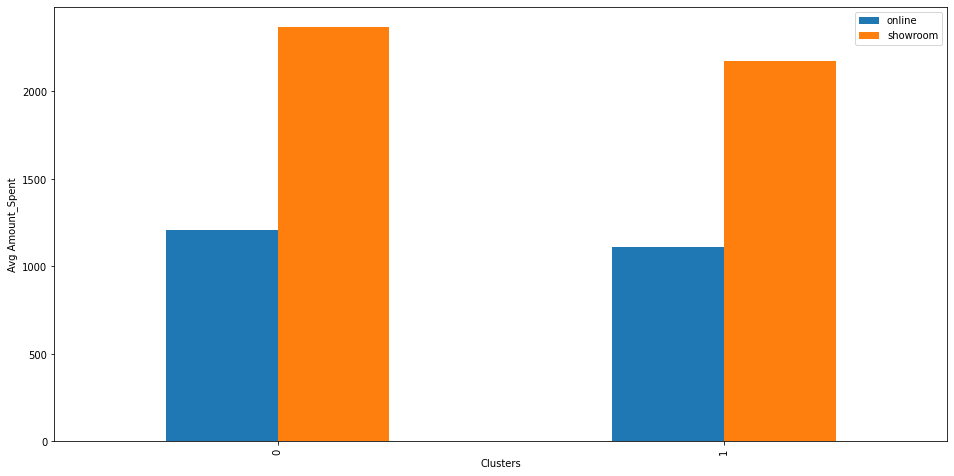

In [ ]:
online_or_showroom_mean.plot(kind='bar',stacked=False,x='column',figsize=(16,8),xlabel='Clusters',ylabel='Avg Amount_Spent')

In [ ]:
items= K_Means_0.iloc[:,6:27]
age_and_gender=K_Means_0.groupby(['Gender','Age_Group'],as_index=False).mean()
age_and_gender=age_and_gender.drop(['Recency','Current_Age','Town','State','Clusters'],axis=1)
age_and_gender

,Gender,Age_Group,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,Female,0-14,118.698113,119.792453,114.000000,119.849057,119.452830,114.528302,111.452830,117.679245,121.056604,114.584906,111.698113,115.849057,115.471698,118.943396,115.094340,112.452830,109.924528,118.547170,108.830189,110.283019,114.981132,1208.490566,59.547170,55.075472,58.169811,60.962264,60.188679,56.773585,57.075472,59.358491,57.490566,61.490566,57.207547,55.735849,59.962264,55.924528,60.113208,57.490566,56.566038,56.226415,59.924528,57.679245,51.716981,402.377358,390.283019,406.943396,413.905660,398.698113,410.962264,3.008302,741.037736,687.264151,1014.433962,602.358491,592.547170,285845.000000,788.490566,912.358491,900.943396,555.283019
1,Female,15-29,117.467532,113.857143,115.545455,117.350649,113.402597,115.246753,112.935065,113.246753,121.064935,117.129870,120.363636,112.519481,114.376623,112.337662,107.831169,112.844156,113.727273,112.610390,117.402597,120.116883,112.298701,1214.467532,56.363636,55.220779,55.558442,52.987013,56.090909,56.272727,56.701299,56.298701,58.844156,59.766234,58.454545,58.207792,57.818182,58.740260,60.857143,55.493506,55.532468,57.805195,57.025974,56.831169,58.337662,403.558442,400.480519,396.623377,404.935065,402.233766,405.844156,3.003636,621.363636,1066.753247,943.311688,794.545455,1026.558442,286028.571429,630.194805,849.285714,820.714286,940.324675
2,Female,30-44,109.356164,115.890411,109.342466,114.671233,117.191781,121.643836,111.767123,113.657534,114.589041,114.260274,118.041096,118.000000,116.287671,119.123288,116.904110,116.068493,115.602740,118.767123,114.904110,109.424658,118.068493,1205.575342,63.136986,60.123288,55.493151,59.232877,60.753425,56.232877,57.835616,54.383562,54.835616,58.602740,62.424658,54.123288,59.589041,57.410959,59.109589,55.972603,56.684932,58.931507,57.630137,60.191781,55.287671,414.369863,404.068493,395.753425,398.684932,404.041096,406.643836,2.995205,775.821918,722.534247,705.684932,861.301370,734.657534,285084.931507,901.712329,675.000000,746.232877,949.931507
3,Female,45-59,110.345679,116.524691,112.629630,118.111111,114.438272,114.376543,111.308642,113.345679,116.567901,113.777778,122.419753,112.654321,116.660494,113.438272,115.395062,117.932099,108.370370,117.858025,113.407407,117.716049,113.728395,1191.024691,56.586420,53.438272,59.203704,58.932099,57.148148,58.376543,56.098765,60.086420,57.858025,59.956790,57.259259,57.487654,60.154321,58.697531,60.888889,56.179012,59.679012,57.561728,59.388889,56.611111,58.388889,402.685185,401.956790,395.314815,402.228395,402.518519,406.302469,3.003148,860.648148,798.302469,769.043210,732.746914,703.765432,285697.098765,889.722222,760.154321,842.932099,941.697531
4,Female,60-74,114.918919,118.148649,112.837838,118.121622,115.945946,116.472973,113.716216,116.364865,112.905405,117.378378,127.810811,114.810811,112.364865,111.743243,117.472973,111.540541,114.175676,115.486486,114.000000,118.756757,119.013514,1215.121622,60.189189,60.432432,61.162162,56.283784,56.689189,57.283784,60.554054,57.148649,55.175676,58.594595,58.675676,58.837838,56.662162,58.202703,60.851351,56.716216,56.770270,60.283784,54.837838,56.567568,56.945946,394.486486,405.027027,410.000000,406.851351,407.256757,410.364865,3.005946,795.067568,894.797297,918.851351,1024.459459,773.581081,288230.472973,981.621622,863.581081,865.337838,961.148649
5,Female,75-89,112.629630,114.203704,114.555556,117.574074,113.611

In [ ]:
age_and_gender1=age_and_gender.iloc[:,0:23]
age_and_gender1['column']=age_and_gender1.index
age_and_gender1

,Gender,Age_Group,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,column
0,Female,0-14,118.698113,119.792453,114.000000,119.849057,119.452830,114.528302,111.452830,117.679245,121.056604,114.584906,111.698113,115.849057,115.471698,118.943396,115.094340,112.452830,109.924528,118.547170,108.830189,110.283019,114.981132,0
1,Female,15-29,117.467532,113.857143,115.545455,117.350649,113.402597,115.246753,112.935065,113.246753,121.064935,117.129870,120.363636,112.519481,114.376623,112.337662,107.831169,112.844156,113.727273,112.610390,117.402597,120.116883,112.298701,1
2,Female,30-44,109.356164,115.890411,109.342466,114.671233,117.191781,121.643836,111.767123,113.657534,114.589041,114.260274,118.041096,118.000000,116.287671,119.123288,116.904110,116.068493,115.602740,118.767123,114.904110,109.424658,118.068493,2
3,Female,45-59,110.345679,116.524691,112.629630,118.111111,114.438272,114.376543,111.308642,113.345679,116.567901,113.777778,122.419753,112.654321,116.660494,113.438272,115.395062,117.932099,108.370370,117.858025,113.407407,117.716049,113.728395,3
4,Female,60-74,114.918919,118.148649,112.837838,118.121622,115.945946,116.472973,113.716216,116.364865,112.905405,117.378378,127.810811,114.810811,112.364865,111.743243,117.472973,111.540541,114.175676,115.486486,114.000000,118.756757,119.013514,4
5,Female,75-89,112.629630,114.203704,114.555556,117.574074,113.611111,119.388889,117.148148,113.592593,113.759259,118.685185,118.074074,115.851852,115.037037,114.851852,118.907407,117.888889,109.722222,120.944444,110.888889,114.611111,122.351852,5
6,Female,90+,107.625000,124.906250,110.343750,113.812500,111.187500,113.843750,116.593750,122.156250,114.156250,117.343750,108.125000,107.156250,112.312500,116.906250,119.718750,109.312500,116.000000,123.531250,121.406250,112.937500,110.562500,6
7,Male,0-14,114.180328,117.836066,113.737705,122.049180,118.557377,125.065574,113.377049,119.295082,120.622951,117.016393,121.262295,113.245902,112.688525,110.540984,113.426230,111.098361,109.295082,113.983607,106.065574,121.704918,115.885246,7
8,Male,15-29,119.030769,118.215385,111.800000,115.553846,111.492308,117.261538,111.923077,115.015385,119.215385,113.384615,114.430769,122.846154,118.892308,108.892308,111.030769,113.446154,109.092308,114.246154,115.353846,116.000000,120.307692,8
9,Male,30-44,118.385714,113.271429,111.200000,109.600000,111.300000,117.642857,114.442857,114.028571,118.357143,120.271429,118.271429,111.071429,109.957143,120.985714,115.357143,119.600000,122.142857,115.314286,118.142857,118.042857,114.257143,9


In [ ]:
age_and_gender2=age_and_gender1.iloc[6:7,:]
age_and_gender2

,Gender,Age_Group,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,column
6,Female,90+,107.625,124.90625,110.34375,113.8125,111.1875,113.84375,116.59375,122.15625,114.15625,117.34375,108.125,107.15625,112.3125,116.90625,119.71875,109.3125,116.0,123.53125,121.40625,112.9375,110.5625,6


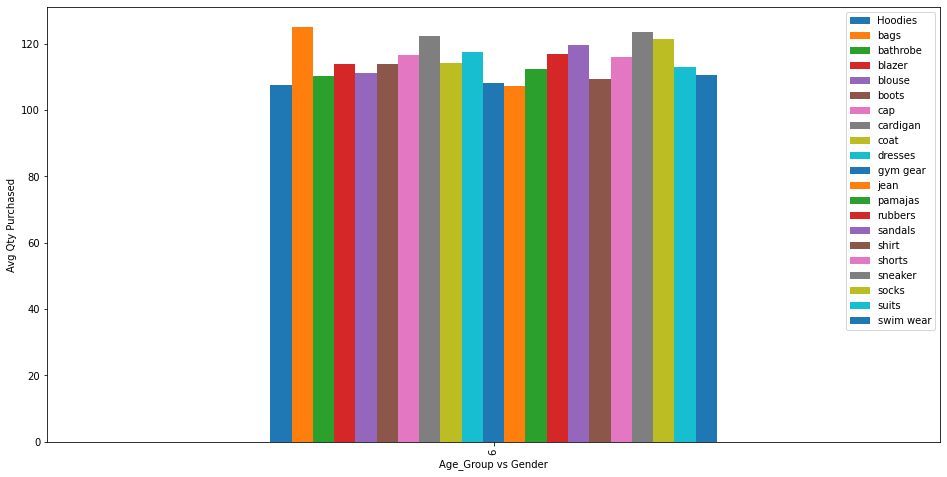

In [ ]:
age_and_gender2.plot(kind='bar',stacked=False,x='column',figsize=(16,8),xlabel='Age_Group vs Gender',ylabel='Avg Qty Purchased')

In [ ]:
items=age_and_gender.iloc[:,2:23]
age_and_gender3=age_and_gender.drop(items,axis=1)

In [ ]:
age_and_gender3.iloc[:,0:24].columns

Index(['Gender', 'Age_Group', 'online', 'showroom_0', 'showroom_1',
       'showroom_10', 'showroom_11', 'showroom_12', 'showroom_13',
       'showroom_14', 'showroom_15', 'showroom_16', 'showroom_17',
       'showroom_18', 'showroom_19', 'showroom_2', 'showroom_20', 'showroom_3',
       'showroom_4', 'showroom_5', 'showroom_6', 'showroom_7', 'showroom_8',
       'showroom_9'],
      dtype='object')

In [ ]:
age_and_gender3

,Gender,Age_Group,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9
0,Female,0-14,1208.490566,59.547170,55.075472,58.169811,60.962264,60.188679,56.773585,57.075472,59.358491,57.490566,61.490566,57.207547,55.735849,59.962264,55.924528,60.113208,57.490566,56.566038,56.226415,59.924528,57.679245,51.716981
1,Female,15-29,1214.467532,56.363636,55.220779,55.558442,52.987013,56.090909,56.272727,56.701299,56.298701,58.844156,59.766234,58.454545,58.207792,57.818182,58.740260,60.857143,55.493506,55.532468,57.805195,57.025974,56.831169,58.337662
2,Female,30-44,1205.575342,63.136986,60.123288,55.493151,59.232877,60.753425,56.232877,57.835616,54.383562,54.835616,58.602740,62.424658,54.123288,59.589041,57.410959,59.109589,55.972603,56.684932,58.931507,57.630137,60.191781,55.287671
3,Female,45-59,1191.024691,56.586420,53.438272,59.203704,58.932099,57.148148,58.376543,56.098765,60.086420,57.858025,59.956790,57.259259,57.487654,60.154321,58.697531,60.888889,56.179012,59.679012,57.561728,59.388889,56.611111,58.388889
4,Female,60-74,1215.121622,60.189189,60.432432,61.162162,56.283784,56.689189,57.283784,60.554054,57.148649,55.175676,58.594595,58.675676,58.837838,56.662162,58.202703,60.851351,56.716216,56.770270,60.283784,54.837838,56.567568,56.945946
5,Female,75-89,1208.574074,57.666667,59.388889,61.185185,57.462963,58.092593,60.185185,53.037037,59.370370,61.444444,60.944444,58.111111,60.925926,61.611111,57.888889,56.370370,53.648148,55.481481,64.055556,57.648148,55.148148,56.037037
6,Female,90+,1193.593750,62.843750,60.906250,55.437500,56.031250,58.968750,55.312500,61.718750,58.843750,56.937500,59.625000,54.062500,61.281250,56.531250,57.656250,57.468750,61.343750,56.500000,60.937500,54.375000,53.031250,56.531250
7,Male,0-14,1217.459016,58.934426,55.721311,58.540984,64.918033,58.721311,58.262295,53.360656,54.819672,55.524590,58.508197,57.967213,56.344262,59.278689,56.377049,56.967213,61.459016,56.147541,58.590164,58.557377,57.688525,56.786885
8,Male,15-29,1211.938462,57.907692,55.661538,55.938462,55.846154,60.107692,53.876923,55.969231,56.246154,56.230769,60.061538,54.784615,57.553846,61.215385,56.353846,59.953846,57.523077,59.323077,57.246154,64.615385,58.169231,50.907692
9,Male,30-44,1226.057143,62.642857,60.614286,56.700000,60.342857,58.814286,58.085714,56.414286,55.900000,57.200000,58.014286,58.600000,53.357143,59.357143,56.085714,60.014286,56.857143,57.971429,57.000000,54.900000,53.657143,53.057143
